# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.184246e+01     7.606779e+00
 * time: 0.0020439624786376953
     1     2.859515e+01     4.682887e+00
 * time: 0.008256912231445312
     2     1.911732e+01     4.290119e+00
 * time: 0.07167601585388184
     3     1.305098e+01     3.167039e+00
 * time: 0.07650184631347656
     4     1.066946e+01     1.763898e+00
 * time: 0.08148884773254395
     5     1.005958e+01     2.333672e+00
 * time: 0.08544802665710449
     6     9.424470e+00     1.625105e+00
 * time: 0.08930683135986328
     7     8.818672e+00     1.290979e+00
 * time: 0.0932319164276123
     8     8.357126e+00     1.216737e+00
 * time: 0.09720301628112793
     9     8.108254e+00     9.799222e-01
 * time: 0.10159492492675781
    10     8.009839e+00     7.716330e-01
 * time: 0.10611295700073242
    11     7.936619e+00     8.793006e-01
 * time: 0.11123991012573242
    12     7.894616e+00     8.261319e-01
 * time: 0.11450791358947754
    13     7.841583e+00     5.070853e-01
 * tim

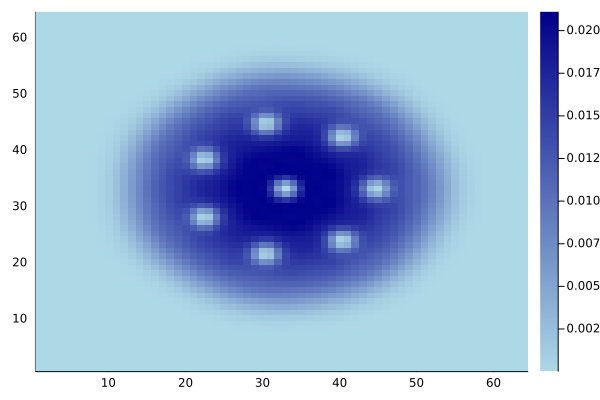

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)